In [181]:
import numpy as np
import pandas as pd
from xverse.feature_subset import FeatureSubset

In [182]:
path = "/home/advice/Python/SR/Data/kdd/uci/uci_creditcard-train-0.2-0.0.csv"
total_var = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'sep_idx']
in_var = ["LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
          "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
          "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]
target_var = ['default payment next month']
fac_var = [ 'SEX','EDUCATION','MARRIAGE',]
num_var = [i for i in in_var if not i in fac_var]

In [183]:
df = pd.read_csv(path)
df[fac_var] = df[fac_var].astype("category")

In [184]:
chi2_check = []
for i in fac_var :
    if chi2_contingency(pd.crosstab(df[target_var[0]], df[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [fac_var, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

      Column              Hypothesis
0        SEX  Reject Null Hypothesis
1  EDUCATION  Reject Null Hypothesis
2   MARRIAGE  Reject Null Hypothesis


In [185]:
# clf = FeatureSubset(num_var) #select only numeric features
# df = clf.fit_transform(df) #returns the dataframe with selected features

In [186]:
from xverse.feature_subset import SplitXY
clf = SplitXY(target_var) #Split the dataset into X and y
X, y = clf.fit_transform(df) #returns features (X) dataset and target(Y) as a numpy array

In [187]:
path = "/home/advice/Python/SR/Data/kdd/uci/uci_creditcard-test-0.2-0.0.csv"
test = pd.read_csv(path)
test[fac_var] = test[fac_var].astype("category")

In [188]:
testX, testy = clf.transform(test)
testX = testX[in_var]

## MonotoincBinning

* missing이 있어도 missing은 na로 남겨두고 나머지를 처리해줌!

In [189]:
from xverse.transformer import MonotonicBinning
import numpy as np
# custom_binning = {"AGE": np.array([10,20,30,40,50,60]) }
# feature_names = num_var,
# custom_binning = custom_binning
clf = MonotonicBinning()
XX = X[in_var]
clf.fit(XX, y)

MonotonicBinning(cardinality_cutoff=5, custom_binning=None, feature_names='all',
                 force_bins=4, max_bins=20, prefix=None)

In [190]:
clf.bins

{'LIMIT_BAL': array([  10000.,   80000.,  200000., 1000000.]),
 'AGE': array([21., 30., 39., 79.]),
 'PAY_0': array([-2.,  0.,  8.]),
 'PAY_2': array([-2.,  0.,  8.]),
 'PAY_3': array([-2., -1.,  0.,  8.]),
 'PAY_4': array([-2.,  0.,  8.]),
 'PAY_5': array([-2., -1.,  0.,  8.]),
 'PAY_6': array([-2., -1.,  0.,  7.]),
 'BILL_AMT1': array([-165580.        ,    8177.66666667,   48512.33333333,
         964511.        ]),
 'BILL_AMT2': array([-69777.        ,   7678.66666667,  47778.        , 983931.        ]),
 'BILL_AMT3': array([-157264.        ,    7307.66666667,   44708.        ,
        1664089.        ]),
 'BILL_AMT4': array([-170000.        ,    6903.66666667,   38981.33333333,
         706864.        ]),
 'BILL_AMT5': array([-81334.,   5814.,  33608., 927171.]),
 'BILL_AMT6': array([-150953.,    4307.,   31258.,  699944.]),
 'PAY_AMT1': array([     0.        ,   1432.        ,   3859.33333333, 873552.        ]),
 'PAY_AMT2': array([      0.,    1300.,    3650., 1215471.]),
 'PAY_A

In [191]:
output_bins = clf.bins #will be used later in this exercise

In [192]:
out_X = clf.transform(XX)

In [193]:
test_X = clf.transform(testX)

In [194]:
pd.crosstab(out_X["LIMIT_BAL"], y)

col_0,0.0,1.0
LIMIT_BAL,,
"(9999.999, 80000.0]",7553,3246
"(80000.0, 200000.0]",7606,1973
"(200000.0, 1000000.0]",8205,1417


In [195]:
pd.crosstab(test_X["LIMIT_BAL"], testy)

col_0,0.0,1.0
LIMIT_BAL,,
"(9999.999, 80000.0]",1455,646
"(80000.0, 200000.0]",1538,388
"(200000.0, 1000000.0]",1731,246


In [196]:
for col in out_X.columns.tolist() :
    out_X[col] = out_X[col].cat.add_categories("missing").fillna("missing")
    test_X[col] = test_X[col].cat.add_categories("missing").fillna("missing")

In [197]:
out_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,"(9999.999, 80000.0]",2,2,1,"(20.999, 30.0]","(0.0, 8.0]","(0.0, 8.0]","(-2.001, -1.0]","(-2.001, 0.0]","(-2.001, -1.0]",...,"(-157264.001, 7307.667]",missing,"(-81334.001, 5814.0]",missing,"(-0.001, 1432.0]","(-0.001, 1300.0]","(-0.001, 1000.0]","(-0.001, 700.0]",missing,"(-0.001, 610.0]"
1,"(80000.0, 200000.0]",2,missing,2,"(20.999, 30.0]","(-2.001, 0.0]","(0.0, 8.0]","(-1.0, 0.0]",missing,"(-1.0, 0.0]",...,"(-157264.001, 7307.667]","(-170000.001, 6903.667]","(-81334.001, 5814.0]","(-150953.001, 4307.0]","(-0.001, 1432.0]","(-0.001, 1300.0]","(-0.001, 1000.0]",missing,"(-0.001, 700.0]","(610.0, 3000.0]"
2,"(80000.0, 200000.0]",2,2,2,missing,"(-2.001, 0.0]","(-2.001, 0.0]","(-1.0, 0.0]","(-2.001, 0.0]","(-1.0, 0.0]",...,"(7307.667, 44708.0]","(6903.667, 38981.333]","(5814.0, 33608.0]","(4307.0, 31258.0]","(1432.0, 3859.333]","(1300.0, 3650.0]",missing,"(700.0, 3000.0]","(700.0, 3000.0]",missing
3,"(9999.999, 80000.0]",2,2,1,"(30.0, 39.0]","(-2.001, 0.0]","(-2.001, 0.0]","(-1.0, 0.0]","(-2.001, 0.0]","(-1.0, 0.0]",...,"(44708.0, 1664089.0]","(6903.667, 38981.333]","(5814.0, 33608.0]","(4307.0, 31258.0]","(1432.0, 3859.333]","(1300.0, 3650.0]","(1000.0, 3015.0]","(700.0, 3000.0]",missing,"(610.0, 3000.0]"
4,"(9999.999, 80000.0]",1,missing,missing,"(30.0, 39.0]","(-2.001, 0.0]","(-2.001, 0.0]","(-1.0, 0.0]","(-2.001, 0.0]","(-1.0, 0.0]",...,"(44708.0, 1664089.0]","(6903.667, 38981.333]",missing,"(4307.0, 31258.0]","(1432.0, 3859.333]","(1300.0, 3650.0]","(-0.001, 1000.0]","(700.0, 3000.0]",missing,"(610.0, 3000.0]"


In [121]:
from scipy.stats import chi2_contingency

In [122]:
chi_res  = chi2_contingency(pd.crosstab(out_X['EDUCATION'], y))
print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

Chi2 Statistic: 130.30324199695778, p-value: 5.432159376649787e-25


In [123]:
chi2_check = []
for i in out_X.columns.tolist():
    if chi2_contingency(pd.crosstab(y, out_X[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('Fail to Reject Null Hypothesis')
res = pd.DataFrame(data = [out_X.columns.tolist(), chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']


       Column              Hypothesis
0   LIMIT_BAL  Reject Null Hypothesis
1         SEX  Reject Null Hypothesis
2   EDUCATION  Reject Null Hypothesis
3    MARRIAGE  Reject Null Hypothesis
4         AGE  Reject Null Hypothesis
5       PAY_0  Reject Null Hypothesis
6       PAY_2  Reject Null Hypothesis
7       PAY_3  Reject Null Hypothesis
8       PAY_4  Reject Null Hypothesis
9       PAY_5  Reject Null Hypothesis
10      PAY_6  Reject Null Hypothesis
11  BILL_AMT1  Reject Null Hypothesis
12  BILL_AMT2  Reject Null Hypothesis
13  BILL_AMT3  Reject Null Hypothesis
14  BILL_AMT4  Reject Null Hypothesis
15  BILL_AMT5  Reject Null Hypothesis
16  BILL_AMT6  Reject Null Hypothesis
17   PAY_AMT1  Reject Null Hypothesis
18   PAY_AMT2  Reject Null Hypothesis
19   PAY_AMT3  Reject Null Hypothesis
20   PAY_AMT4  Reject Null Hypothesis
21   PAY_AMT5  Reject Null Hypothesis
22   PAY_AMT6  Reject Null Hypothesis


In [124]:
check = {}
for i in res[res['Hypothesis'] == 'Reject Null Hypothesis']['Column']:
    dummies = pd.get_dummies(out_X[i])
    bon_p_value = 0.05/out_X[i].nunique()
    for series in dummies:
        if chi2_contingency(pd.crosstab(y, dummies[series]))[1] < bon_p_value:
            check['{}_{}'.format(i, series)] = 'Reject Null Hypothesis'
        else:
            check['{}_{}'.format(i, series)] = 'Fail to Reject Null Hypothesis'
res_chi_ph = pd.DataFrame(data = [check.keys(), check.values()]).T
res_chi_ph.columns = ['Pair', 'Hypothesis']
res_chi_ph

,Pair,Hypothesis
0,"LIMIT_BAL_(9999.999, 80000.0]",Reject Null Hypothesis
1,"LIMIT_BAL_(80000.0, 200000.0]",Reject Null Hypothesis
2,"LIMIT_BAL_(200000.0, 1000000.0]",Reject Null Hypothesis
3,LIMIT_BAL_missing,Fail to Reject Null Hypothesis
4,SEX_1.0,Reject Null Hypothesis
...,...,...
88,PAY_AMT5_missing,Fail to Reject Null Hypothesis
89,"PAY_AMT6_(-0.001, 610.0]",Reject Null Hypothesis
90,"PAY_AMT6_(610.0, 3000.0]",Fail to Reject Null Hypothesis
91,"PAY_AMT6_(3000.0, 528666.0]",Reject Null Hypothesis


In [198]:
significant_chi = []
for i in res_chi_ph[res_chi_ph['Hypothesis'] == 'Reject Null Hypothesis']['Pair']:
    significant_chi.append(i)
    # '{}_{}'.format(i.split('-')[0],i.split('-')[1])
for i in ['SEX_1.0']:
    significant_chi.remove(i)

In [202]:
f"기존 : {len(res_chi_ph)} -> 압축 : {len(significant_chi)}"

'기존 : 93 -> 압축 : 51'

In [127]:
dummy_x = pd.get_dummies(out_X)
dummy_test_x = pd.get_dummies(test_X)

In [151]:
def roc_curve_plot(model, x , y ) :
    preds = model.predict_proba(x)[:,1]
    fpr, tpr, threshold = roc_curve(y, preds)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,8))
    plt.title('Receiver Operator Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(round(roc_auc, 2)))
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [152]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score
rf_model = RandomForestClassifier(max_depth=6, n_jobs=10,n_estimators=100)
rf_model.fit(dummy_x[significant_chi], y)
#Metrics check
predictions = rf_model.predict(dummy_test_x[significant_chi])
print(accuracy_score(testy, predictions)*100)
print(classification_report(testy,predictions))

81.52898067954698
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      4724
         1.0       0.67      0.26      0.38      1280

    accuracy                           0.82      6004
   macro avg       0.75      0.61      0.63      6004
weighted avg       0.79      0.82      0.78      6004



In [158]:
%matplotlib inline

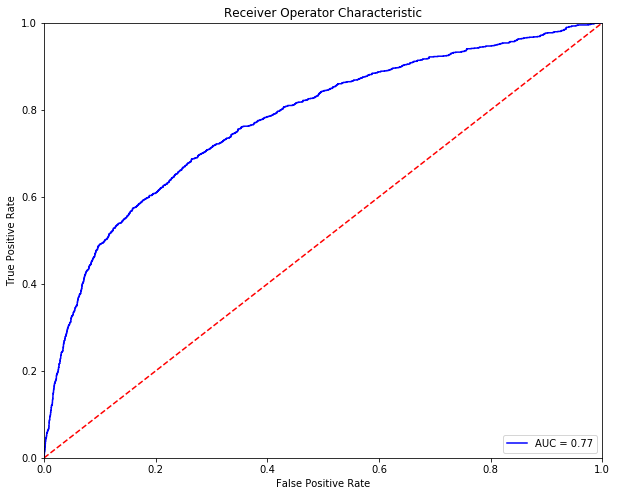

In [160]:
roc_curve_plot(rf_model , dummy_test_x[significant_chi], testy)

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc, accuracy_score
rf_model = RandomForestClassifier(max_depth=6, n_jobs=10,n_estimators=100)
rf_model.fit(dummy_x, y)
#Metrics check
predictions = rf_model.predict(dummy_test_x)
print(accuracy_score(testy, predictions)*100)
print(classification_report(testy,predictions))

81.34576948700865
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      4724
         1.0       0.68      0.24      0.35      1280

    accuracy                           0.81      6004
   macro avg       0.75      0.60      0.62      6004
weighted avg       0.79      0.81      0.78      6004



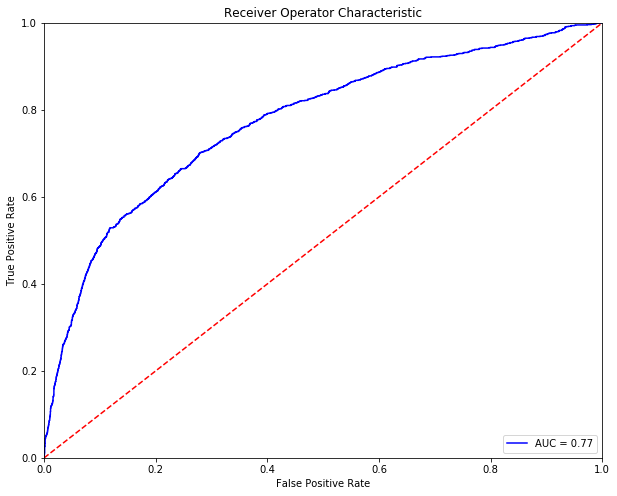

In [162]:
roc_curve_plot(rf_model , dummy_test_x, testy)